In [1]:
!nvidia-smi

Fri Jul 26 03:13:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd i

In [3]:
!pip freeze | grep 'tensor\|torch\|Keras'

Keras==2.2.4
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
mesh-tensorflow==0.0.5
tensor2tensor==1.11.0
tensorboard==1.14.0
tensorboardcolab==0.0.22
tensorflow==1.14.0
tensorflow-estimator==1.14.0
tensorflow-hub==0.5.0
tensorflow-metadata==0.14.0
tensorflow-probability==0.7.0
torch==1.1.0
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.3.0


In [0]:
%%capture

!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/project-dog-classification/haarcascades/haarcascade_frontalface_alt.xml -P haarcascades/

In [0]:
%%capture

!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/American_water_spaniel_00648.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Brittany_02625.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Curly-coated_retriever_03896.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Labrador_retriever_06449.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Labrador_retriever_06455.jpg	 -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Labrador_retriever_06457.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/sample_cnn.png -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/sample_dog_output.png -P images/
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/project-dog-classification/images/sample_human_output.png -P images/

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_dog_output.png?raw=1)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
%%capture

!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

In [0]:
%%capture

!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip lfw.zip

In [8]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


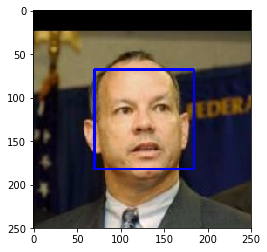

In [9]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

- 100% of the first 100 images in human_files have a detected human face
- 9% of the first 100 images in dog_files have a detected human face

In [11]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_face_count = 0
for f in human_files_short:
    have_face = face_detector(f)
    if have_face:
        human_face_count += 1

print(f"{human_face_count}% of the first 100 images in human_files have a detected human face")

dog_face_count = 0
for f in dog_files_short:
    have_face = face_detector(f)
    if have_face:
        dog_face_count += 1

print(f"{dog_face_count}% of the first 100 images in dog_files have a detected human face")

99% of the first 100 images in human_files have a detected human face
8% of the first 100 images in dog_files have a detected human face


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [13]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:11<00:00, 47554480.08it/s]


In [14]:
# check structure
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 

In [0]:
# based on Pytorch documentation
# Ref. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
}

In [0]:

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Get image
    img = Image.open(img_path)
    
    # Transform image
    img = data_transforms['train'](img)
    
    # Since we take in single image, add 1 to dim 0
    # Ref. https://medium.com/@josh_2774/deep-learning-with-pytorch-9574e74d17ad
    img.unsqueeze_(0)
    
    # Move data to GPU if CUDA is available
    if use_cuda:
        img = img.cuda()

    # Get prediction from VGG16
    prediction = VGG16(img)
    
    # Move prediction to cuda
    if use_cuda:
        prediction = prediction.cuda()
    
    # Get predict class
    predicted_class_index = prediction.cpu().data.numpy().argmax()
    
    return predicted_class_index # predicted class index

In [18]:
# Test VGG16_predict(img_path)
VGG16_predict(dog_files[0])

156

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    predicted_class_index = VGG16_predict(img_path)
    
    is_dog = (predicted_class_index >= 151) and (predicted_class_index <= 268)
    
    return is_dog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- 0 % of images in human_files_short have a detected dog
- 98 % of images in dog_files_short have a detected dog


In [20]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_in_humanfiles = 0
dog_in_dogfiles = 0

for f in human_files_short:
    if dog_detector(f):
        dog_in_humanfiles += 1

for f in dog_files_short:
    if dog_detector(f):
        dog_in_dogfiles += 1
        
print(f"{dog_in_humanfiles} % of images in human_files_short have a detected dog")
print(f"{dog_in_dogfiles} % of images in dog_files_short have a detected dog")

1 % of images in human_files_short have a detected dog
99 % of images in dog_files_short have a detected dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Brittany_02625.jpg?raw=1" width="100"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg?raw=1" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Curly-coated_retriever_03896.jpg?raw=1" width="200"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/American_water_spaniel_00648.jpg?raw=1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06457.jpg?raw=1" width="150"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06455.jpg?raw=1" width="240"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06449.jpg?raw=1" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 32
num_workers = 1

# Ref. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
}

data_dir = 'dogImages'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid', 'test']}

loaders_scratch = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=num_workers)
                    for x in ['train', 'valid', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
# check dataloaders
loaders_scratch

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f8d56caf710>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f8d558016d8>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f8d56caf7f0>}

In [24]:
# check class_names
class_names[:5]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute']

In [25]:
# check num of classes
len(class_names)

133

In [26]:
# check device
device

device(type='cuda', index=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:


 - Resize
   - Train data
     - Crop to a random size and aspect ratio and finally resize to 224 x 224
   - Validation and Test data
     - Resize to 256 because imagenet images are 256 x 256 pixels, our VGG16 is pretrained on imagenet
     - Centre crop 224 x 224
   - We choose input size 224 x 224 pixels since VGG16 expected this shape as input with 3 channels
   

 - Data Augmentation
   - Train data
     - Add random horizontal flip
   - Validation and Test data
     - No data Argumentation because we shouldn't add manual inputs to validation and test data



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import time

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### Taken from CIFAR10 exercise
    def __init__(self):
        # initialize
        super(Net, self).__init__()
        
        ## Conv layers x 5
        
        # see 224 x 224 x 3 image tensor
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        
        # see 112 x 112 x 16 tensor
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        # see 56 x 56 x 32 tensor
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        # see 28 x 28 x 64 tensor
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        # see 14 x 14 x 128 tensor
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
       
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        ## Batchnormalization layer
        
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
        
        ## Fully connected layer x 3
        
        # linear layer (256 * 7 * 7) -> 512
        self.fc1 = nn.Linear(7 * 7 * 256, 1024)
        
        # linear layer 521 -> 256
        self.fc2 = nn.Linear(1024, 512)
        
        # linear layer 256 -> 133 (number of classes)
        self.fc3 = nn.Linear(512, 133)
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))

        # flatten
        x = x.view(-1, 256 * 7 * 7)
        
        # add dropout before fully connected layer
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
       
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = self.fc3(x)

        return x



#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [29]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12544, out_features=1024, bias=True)
  (fc2): Li

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1.  Use 5 layers CNN because the image pixel size is larger than the cifar10 examples.
2.  We add batch normalization to each conv layer to increase speed and performance.
3.  We add padding=1, so the image size will only divide by 2 by the maxpooling layer, since the output size is: (W - F + 2P) / S + 1 .
4. We use Relu as activation function except last output layer, to avoid gradient vanishing problem in deep hidden layers.
5. We set dropout rate to 0.5 for the model to perform better.
6. We define the layers in __init__ function, use 5 layers of convolution layers with 3 fully connected layers.
7. Each convolutional layer we also apply batch normalization and dropout with 0.5 dropout rate. 
8. After convolutional phase, the convolutional layers should be able to capture features in the image, we then flatten the image to connect to fully connected layer to do the classification.
9. Last layer we need to know which of the 133 classes a image belongs to. So we don't apply Relu activation.
10. We need to move the model to GPU if available


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [31]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        # calculate epoch time
        t0 = time.time()
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly

            # clean gradients
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # update parameter
            optimizer.step()
            
            # update train loss
            # train_loss += loss.item() * data.size(0)
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            
            # batch loss
            loss = criterion(output, target)
            
            # update val loss
            # valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # avg loss
        # train_loss /= len(loaders['train'].sampler)
        # valid_loss /= len(loaders['valid'].sampler)

        # print epoch time
        print('Epoch time: {:.1f} seconds'.format(time.time() - t0))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f"Val loss from {valid_loss_min:.3f} to {valid_loss:.3f}")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch time: 139.9 seconds
Epoch: 1 	Training Loss: 4.917081 	Validation Loss: 4.746262
Val loss from inf to 4.746
Epoch time: 123.8 seconds
Epoch: 2 	Training Loss: 4.789120 	Validation Loss: 4.693917
Val loss from 4.746 to 4.694
Epoch time: 128.2 seconds
Epoch: 3 	Training Loss: 4.745170 	Validation Loss: 4.647961
Val loss from 4.694 to 4.648
Epoch time: 131.7 seconds
Epoch: 4 	Training Loss: 4.703910 	Validation Loss: 4.588565
Val loss from 4.648 to 4.589
Epoch time: 136.7 seconds
Epoch: 5 	Training Loss: 4.658935 	Validation Loss: 4.518235
Val loss from 4.589 to 4.518
Epoch time: 132.6 seconds
Epoch: 6 	Training Loss: 4.615155 	Validation Loss: 4.500075
Val loss from 4.518 to 4.500
Epoch time: 137.5 seconds
Epoch: 7 	Training Loss: 4.581630 	Validation Loss: 4.519633
Epoch time: 134.7 seconds
Epoch: 8 	Training Loss: 4.524027 	Validation Loss: 4.369902
Val loss from 4.500 to 4.370
Epoch time: 133.6 seconds
Epoch: 9 	Training Loss: 4.485529 	Validation Loss: 4.225708
Val loss from 4.

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

Download model from Colab

In [0]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [32]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.194023


Test Accuracy: 41% (351/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
loaders_transfer = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=num_workers)
                    for x in ['train', 'valid', 'test']}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [34]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# Ref. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# Use ResNet18, Ref. https://pytorch.org/docs/stable/torchvision/models.html
model_transfer = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 80312228.11it/s]


In [0]:
for param in  model_transfer.parameters():
    param.require_grad = False

In [0]:
num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, 133)

In [37]:
if use_cuda:
    model_transfer = model_transfer.cuda()

model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1. We load the ResNet18 model with pretrained weights since our images are similar to those images from ImageNet.
2. We fix all the weights, thus it won't change during our fine tuning process.
3. We then remove the last fully connected layer to retrain the model to give us the classification based on our output classes.
4. We add back a new fully connected layer with same input features, but output features are based on number of classes we are going to predict.
5. The last classification layer will be retrained by the training data from our data loader. 
6. Move the model to GPU is available.

We choose ResNet18 because from the documentation it performs well on the ImageNet dataset, with 30.24 ImageNet 1-crop error rates (224x224). The input is 224x224 which is the same size after our transformation.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [39]:
n_epochs = 50
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch time: 127.8 seconds
Epoch: 1 	Training Loss: 3.459453 	Validation Loss: 2.508954
Val loss from inf to 2.509
Epoch time: 103.4 seconds
Epoch: 2 	Training Loss: 2.440639 	Validation Loss: 2.200365
Val loss from 2.509 to 2.200
Epoch time: 105.2 seconds
Epoch: 3 	Training Loss: 2.075239 	Validation Loss: 1.631444
Val loss from 2.200 to 1.631
Epoch time: 104.5 seconds
Epoch: 4 	Training Loss: 1.848084 	Validation Loss: 1.516813
Val loss from 1.631 to 1.517
Epoch time: 103.9 seconds
Epoch: 5 	Training Loss: 1.768580 	Validation Loss: 1.367794
Val loss from 1.517 to 1.368
Epoch time: 101.5 seconds
Epoch: 6 	Training Loss: 1.654068 	Validation Loss: 1.272754
Val loss from 1.368 to 1.273
Epoch time: 101.0 seconds
Epoch: 7 	Training Loss: 1.490526 	Validation Loss: 1.242820
Val loss from 1.273 to 1.243
Epoch time: 101.0 seconds
Epoch: 8 	Training Loss: 1.451291 	Validation Loss: 1.383654
Epoch time: 103.0 seconds
Epoch: 9 	Training Loss: 1.382097 	Validation Loss: 1.202294
Val loss from 1.

In [40]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [41]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.810735


Test Accuracy: 77% (645/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # Get image
    img = Image.open(img_path)
    
    # Transform image
    img = data_transforms['test'](img)
    
    # Since we take in single image, add 1 to dim 0
    # Ref. https://medium.com/@josh_2774/deep-learning-with-pytorch-9574e74d17ad
    img.unsqueeze_(0)
    
    # Move data to GPU if CUDA is available
    if use_cuda:
        img = img.cuda()

    # Get prediction from VGG16
    prediction = model_transfer(img)
    
    # Move prediction to cuda
    if use_cuda:
        prediction = prediction.cuda()
    
    # Get predict class
    predicted_class_index = prediction.cpu().data.numpy().argmax()
    
    return class_names[predicted_class_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_human_output.png?raw=1)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    predicted_breed = predict_breed_transfer(img_path)
    
    if dog_detector(img_path):
        is_dog = True
        result = f"Predicted breed of dog is {predicted_breed}"
    else:
        is_dog = False
        
    if face_detector(img_path):
        is_human = True
        result = f"You look like {predicted_breed}"
    else:
        is_human = False
        
    if not (is_dog or is_human):
        result = "Error: Neither dog or human detected."
        
    return result

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The result is ok, not better than expected. The dogs breeds are almost correct and the human predictions have some similarities.

Possible improvement:
1. Better Model: For example use ResNet50 instead.
2. Get more data: Get additional dog breed dataset to further train our model.
3. Stacking: Use multiple model to do stacking and get a better prediction.
4. Fine tune hyperparameters: For example, increase number of epoches to get a better result.

In [0]:
def show_img(file):
    # load color (BGR) image
    img = cv2.imread(file)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image
    plt.imshow(cv_rgb)
    plt.show()

In [0]:
%%capture

# Get 6 test files
!wget https://cdn.cnn.com/cnnnext/dam/assets/190722153639-trump-oval-office-bilat-07222019-exlarge-169.jpg -P test_imgs/
!wget https://cdn.images.express.co.uk/img/dynamic/78/285x395/1157571_1.jpg -P test_imgs/
!wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234710/Chihuahua-On-White-03.jpg -P test_imgs/
!wget https://www.dogster.com/wp-content/uploads/2019/04/DSTR-1906-Italian-Greyhound.jpg -P test_imgs/
!wget https://www.yourpurebredpuppy.com/dogbreeds/photos-CD/cavalierkingcharlesspanielsf2.jpg -P test_imgs/

In [0]:
%%capture

!wget https://cdn.cnn.com/cnnnext/dam/assets/190722153639-trump-oval-office-bilat-07222019-exlarge-169.jpg -P test_imgs/
!wget https://e3.365dm.com/19/07/768x432/skynews-boris-johnson-speech_4727246.jpg -P test_imgs/

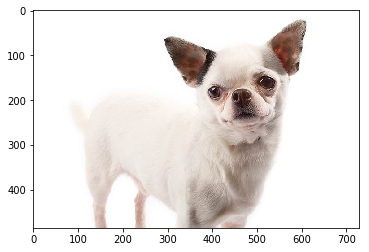

Predicted breed of dog is Chihuahua


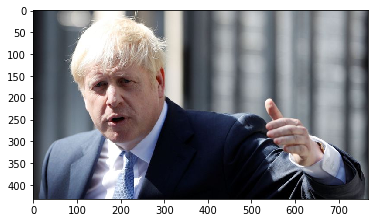

You look like Komondor


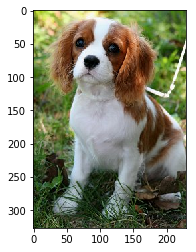

Predicted breed of dog is Cavalier king charles spaniel


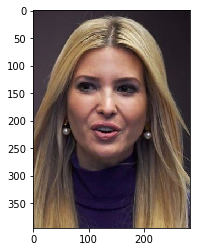

You look like Afghan hound


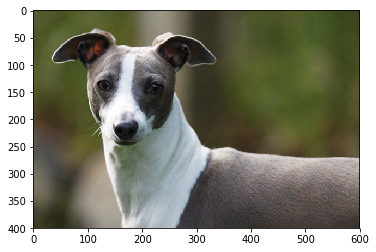

Predicted breed of dog is Parson russell terrier


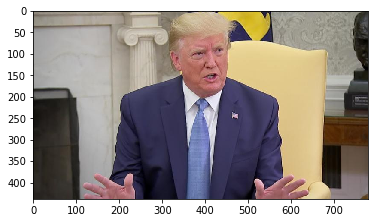

You look like Bull terrier


In [54]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.


# Test my images
test_files = np.array(glob("test_imgs/*"))

for file in test_files:
    result = run_app(file)
    show_img(file)
    print(result)

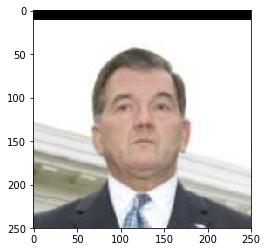

You look like Basenji


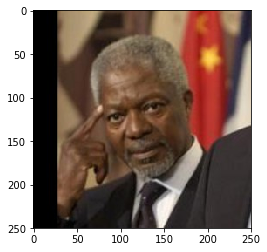

You look like Chihuahua


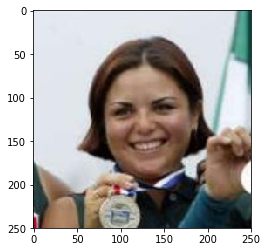

You look like Airedale terrier


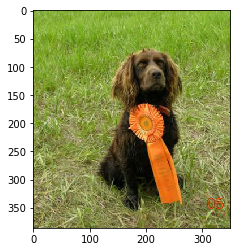

Predicted breed of dog is Boykin spaniel


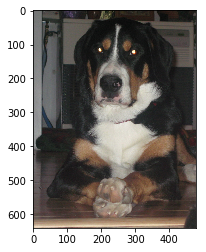

Predicted breed of dog is Greater swiss mountain dog


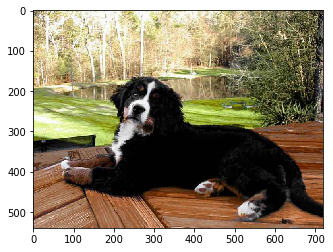

Predicted breed of dog is Bernese mountain dog


In [47]:
# Test existing samples
for file in np.hstack((np.random.choice(human_files, 3, replace=False), np.random.choice(dog_files, 3, replace=False))):
    result = run_app(file)
    show_img(file)
    print(result)